# Effective Stress Prediction Model


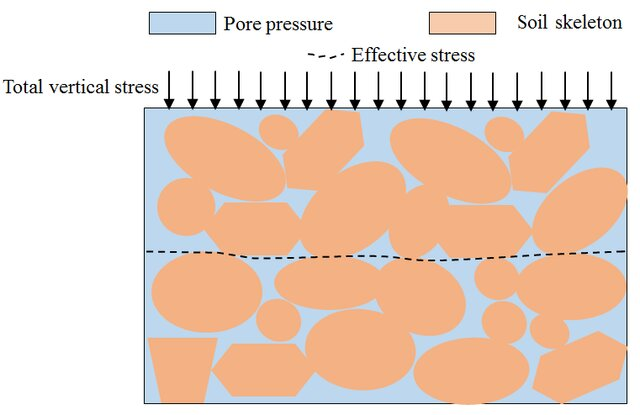

*Effective Stress prediction is a very important area in Dams contruction, Reservoirs, Skyscrappers (piling Works), oil and gas exploration and production and it is done in all basins of the world where exploration wells are drilled for hydrocarbon. Sudden changes in pore pressure when drilling a well and well stability can cause major problems when one is unprepared. So, effective stress is very important to geotechnical engineer, geologists, petrophysicists, and reservoir engineers. An accurate effective stress prediction can help us to reduce drilling risk/hazard, to increase wellbore stability, to optimize casing seat selection etc...*

*Because of Pore pressure Prediction we can predict possible Risks and required for well planning*

### TODO Tasks:
- Importing Data 
- Data Analysis 
- Data Processing
- Model Building 
- Hypertuning of models

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd 
import numpy as np

In [4]:
drill1= pd.read_csv('G:\CODEIEIEIE\projects\effective stress model\Effective stress model/well 1.csv')
drill2= pd.read_csv('G:\CODEIEIEIE\projects\effective stress model\Effective stress model/well 2.csv')
drill3= pd.read_csv('G:\CODEIEIEIE\projects\effective stress model\Effective stress model/well 3.csv')
drill4= pd.read_csv('G:\CODEIEIEIE\projects\effective stress model\Effective stress model/well 4.csv')
drill5= pd.read_csv('G:\CODEIEIEIE\projects\effective stress model\Effective stress model/well 5.csv')
drill6= pd.read_csv('G:\CODEIEIEIE\projects\effective stress model\Effective stress model/well 6.csv')
drill7= pd.read_csv('G:\CODEIEIEIE\projects\effective stress model\Effective stress model/well 7.csv')
drill8= pd.read_csv('G:\CODEIEIEIE\projects\effective stress model\Effective stress model/well 8.csv')

In [5]:
df= pd.concat([drill1,drill2,drill3,drill4,drill5,drill6,drill7,drill8])

In [6]:
df.shape

(615, 11)

In [7]:
df

,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP,effective stress
0,22.0024,57.3820,1.4506,1.4614,0.033808,11.4844,66.1596,0.7881,312783.4781,1609.000,311174.4781
1,22.1548,58.0070,1.4506,1.4594,0.044766,11.4844,66.1591,0.7751,314949.9782,1609.000,313340.9782
2,22.3072,59.1046,1.4506,1.4577,0.064012,11.4844,66.1585,0.7798,317116.4783,1609.000,315507.4783
3,22.4596,59.2124,1.4506,1.4567,0.065902,11.4844,66.1581,0.7711,319282.9784,1609.000,317673.9784
4,22.6120,59.8294,1.4506,1.4564,0.076721,11.4844,66.1575,0.7446,321449.4786,1609.000,319840.4786
...,...,...,...,...,...,...,...,...,...,...,...
67,33.3222,90.8276,1.5868,1.4695,0.691474,10.3713,70.0348,0.8125,518181.5362,1552.000,516629.5362
68,33.4746,88.0723,1.5889,1.4697,0.652240,10.2244,71.2737,0.8095,521240.3610,1552.000,519688.3610
69,33.6270,87.5587,1.5930,1.4705,0.644927,10.1277,69.8588,0.8006,524964.5478,1552.498,523412.0498
70,33.7794,87.7444,1.5935,1.4714,0.647571,10.2424,70.8635,0.7901,527509.2442,1554.988,525954.2562


In [8]:
df.isnull().sum()

DEPTH               0
GR                  0
RHOB                0
Vp                  0
Vsh                 0
Caliper             0
Porosity            0
Resistivity         0
Stress              0
PP                  0
effective stress    0
dtype: int64

No null values

Outliers

For training data

In [9]:
df.columns

Index(['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'Stress', 'PP', 'effective stress'],
      dtype='object')

In [10]:
cols= ['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'PP','Stress', 'effective stress']

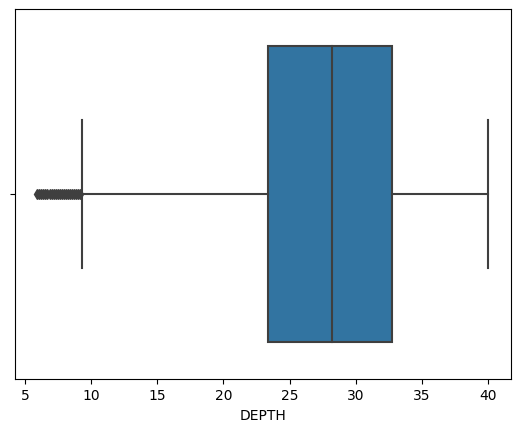

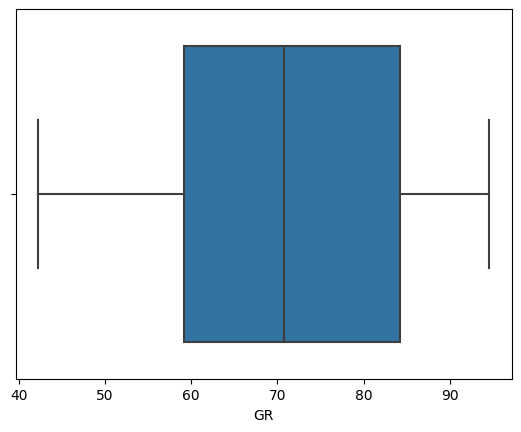

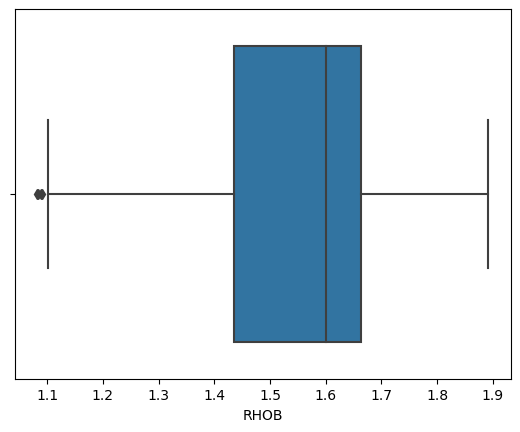

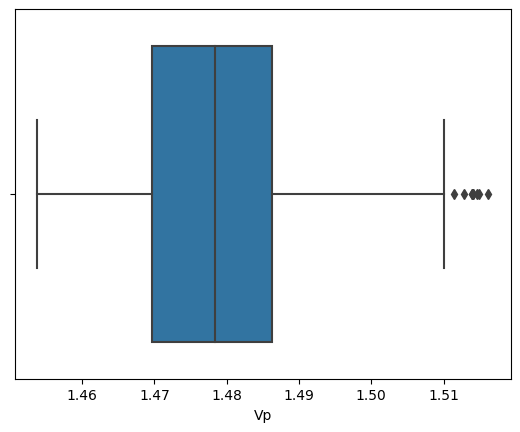

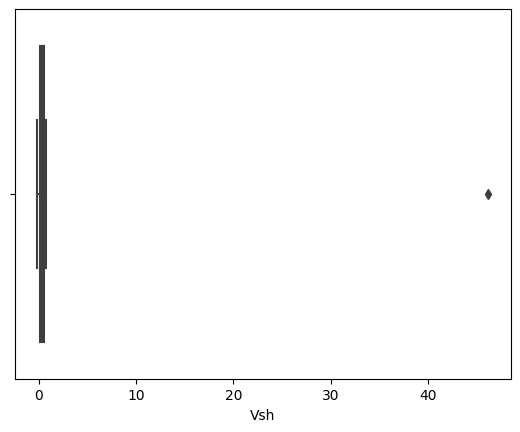

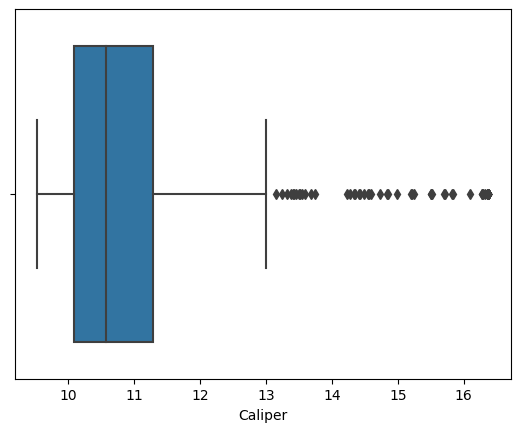

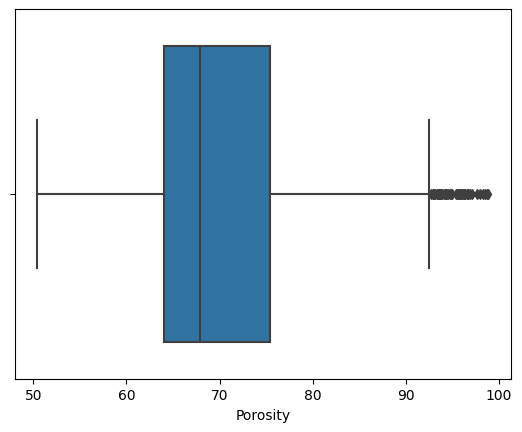

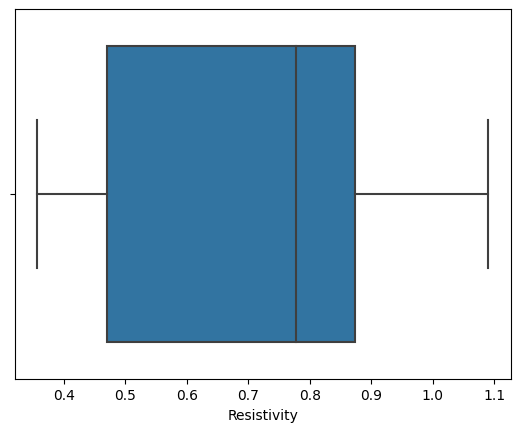

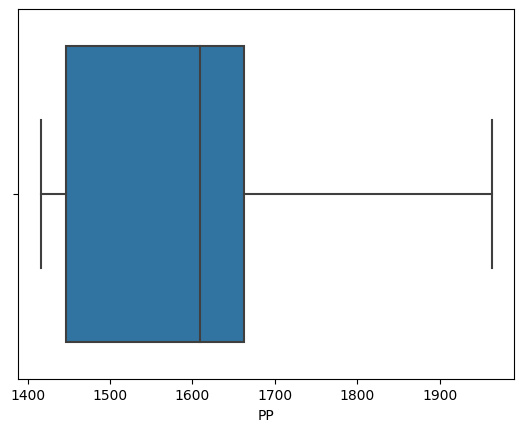

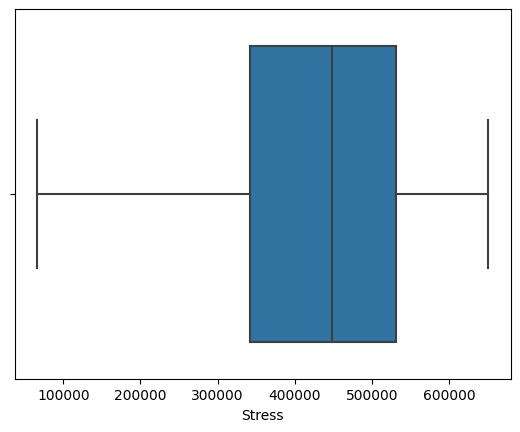

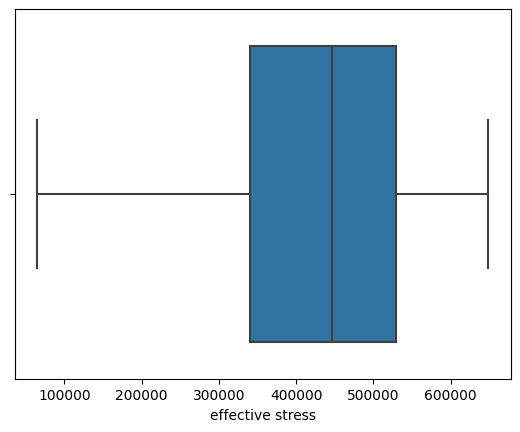

In [11]:
for col in cols :
    plt.figure()
    sns.boxplot(x=df[col])

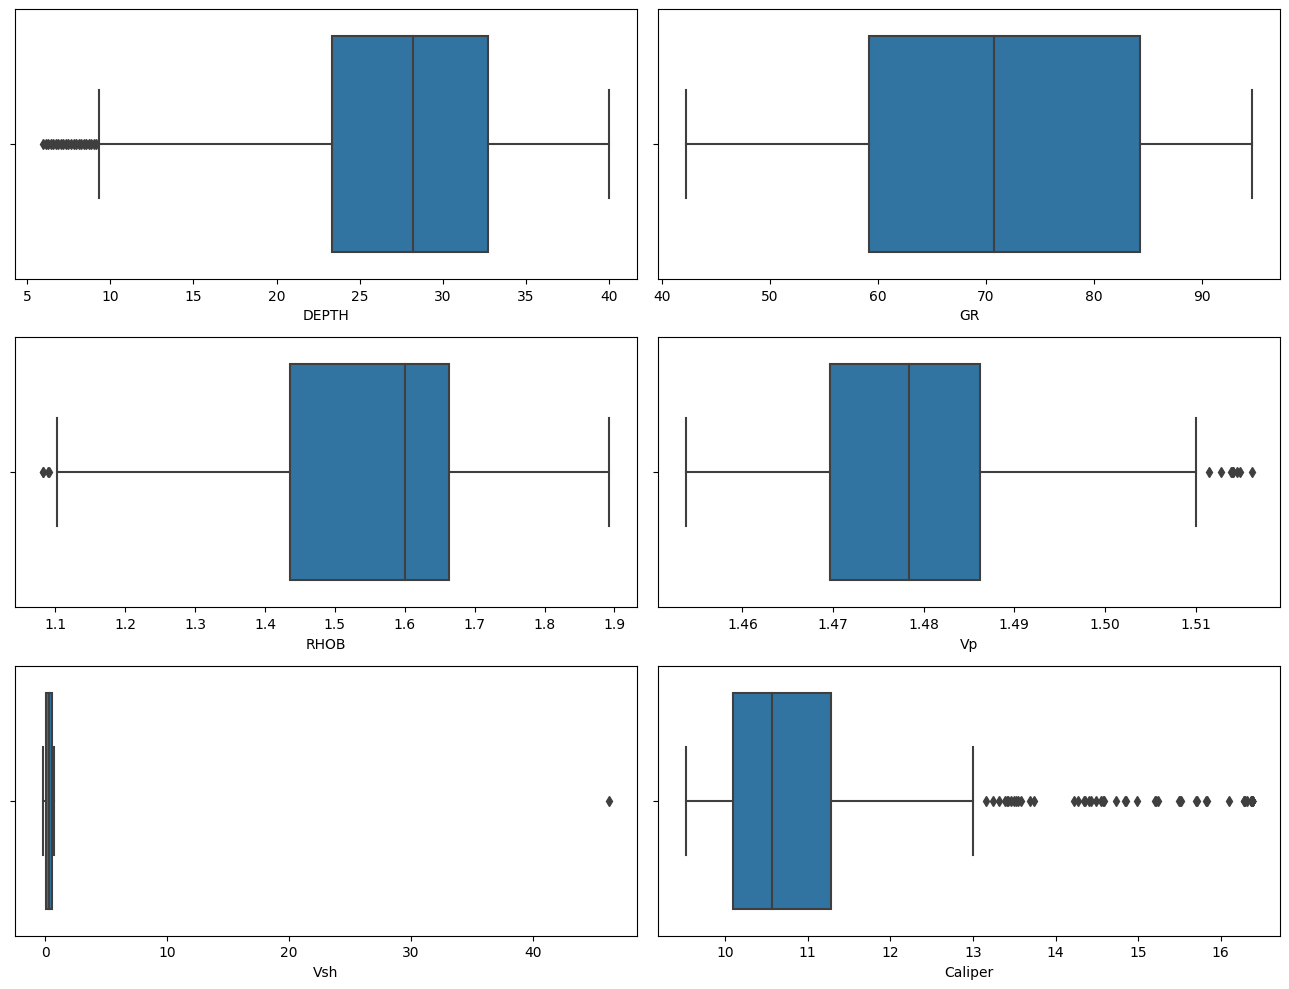

In [12]:
plt.figure(figsize=(13,10))
plt.subplot(3,2,1)
sns.boxplot(x=df['DEPTH'])
#plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
sns.boxplot(x=df['GR'])
#plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
sns.boxplot(x=df['RHOB'])
#plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
sns.boxplot(x=df['Vp'])
#plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
sns.boxplot(x=df['Vsh'])
#plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
sns.boxplot(x=df['Caliper'])
#plt.title('After Outlier Removal with One-class SVM', size=15)


plt.tight_layout()
plt.show()

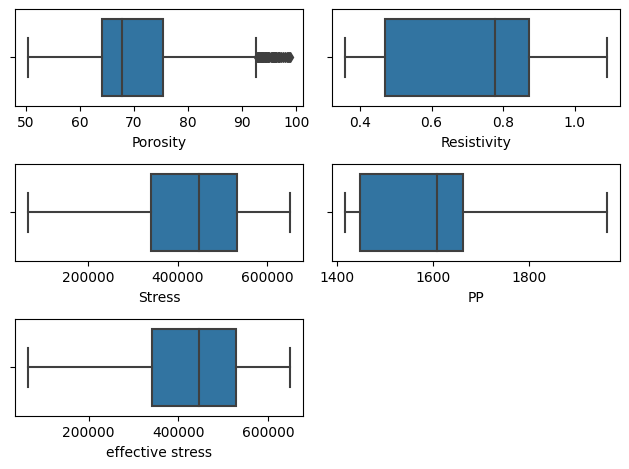

In [13]:
plt.subplot(3,2,1)
sns.boxplot(x=df['Porosity'])
#plt.title('After Outlier Removal with One-class SVM', size=15)

plt.subplot(3,2,2)
sns.boxplot(x=df['Resistivity'])
#plt.title('After Outlier Removal with One-class SVM', size=15)

plt.subplot(3,2,3)
sns.boxplot(x=df['Stress'])
#plt.title('After Outlier Removal with One-class SVM', size=15)

plt.subplot(3,2,4)
sns.boxplot(x=df['PP'])
#plt.title('After Outlier Removal with One-class SVM', size=15)

plt.subplot(3,2,5)
sns.boxplot(x=df['effective stress'])
#plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout()
plt.show()


In [14]:

df['DEPTH'][df['DEPTH']<10]= np.nan
# GR
df['GR'][df['GR']<77.4]= np.nan
# RHOB
df['RHOB'][df['RHOB']>1.76] = np.nan
# Vp
df['Vp'][df['Vp']>1.51] = np.nan
# Vsh
df['Vsh'][df['Vsh']>5] = np.nan
# Caliper
# df['Caliper'][df['Caliper']>11]= np.nan
# Porosity
df['Porosity'][df['Porosity']<54]= np.nan
# Resistivity
df['Resistivity'][df['Resistivity']<0.7]= np.nan

In [15]:
df= df.dropna()

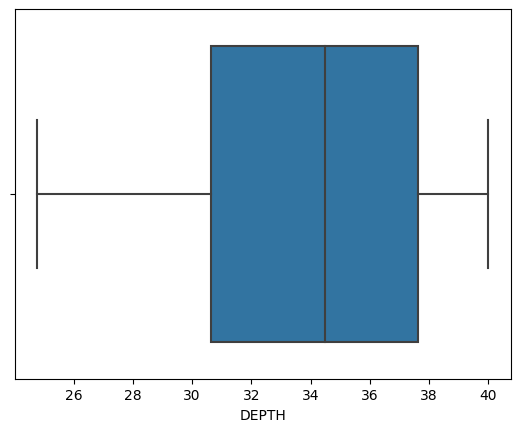

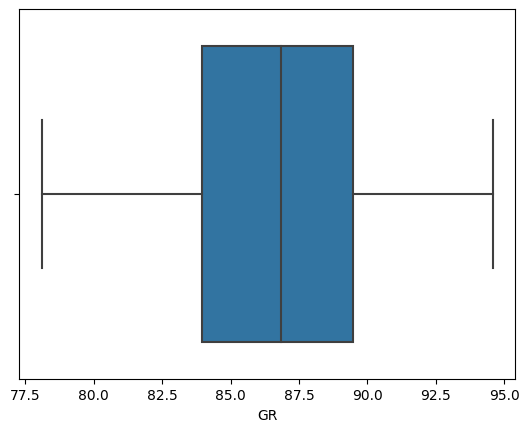

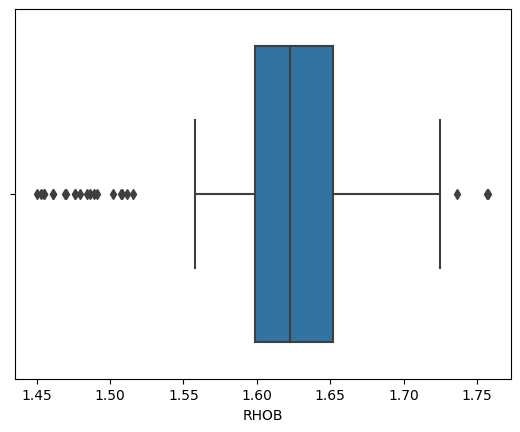

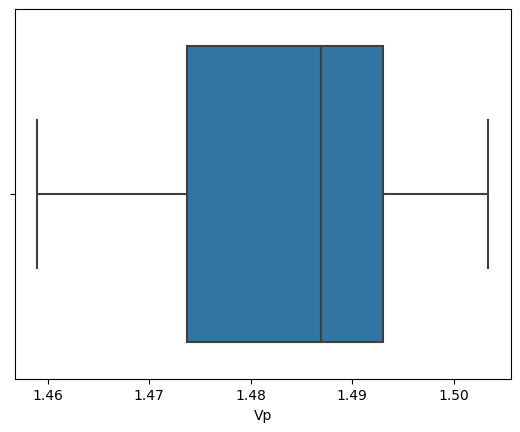

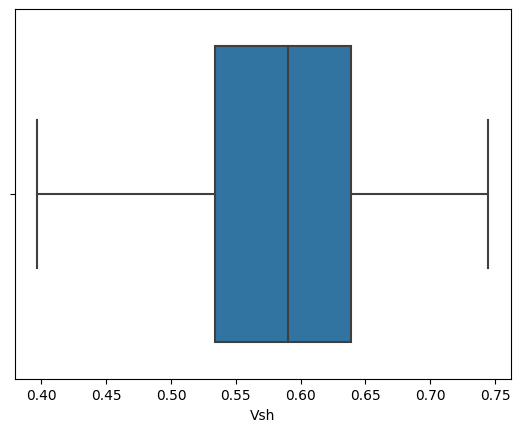

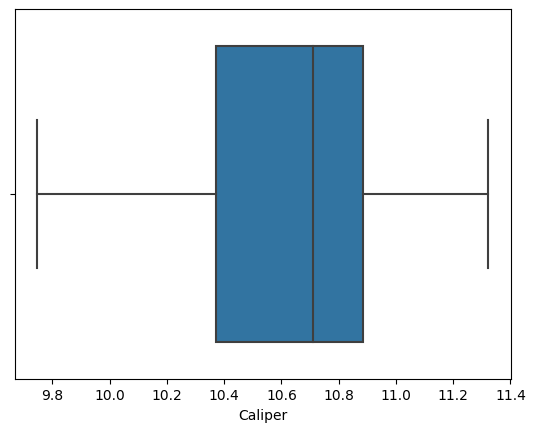

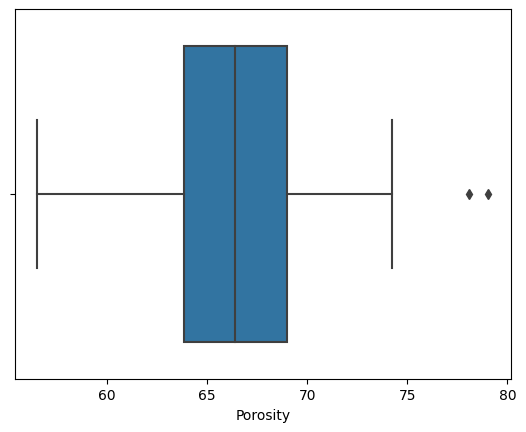

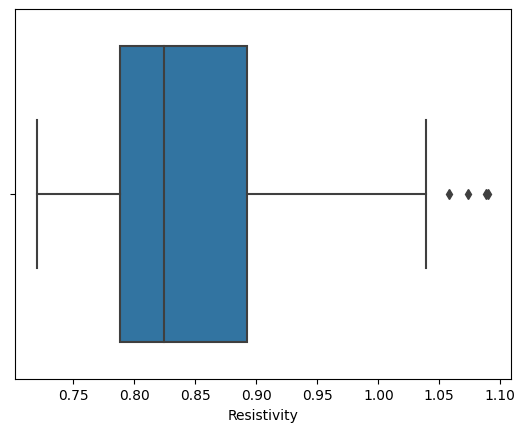

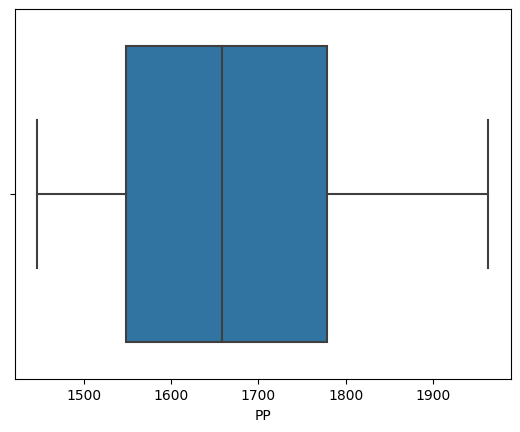

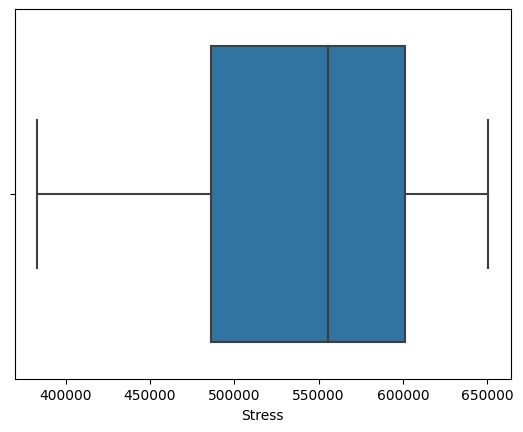

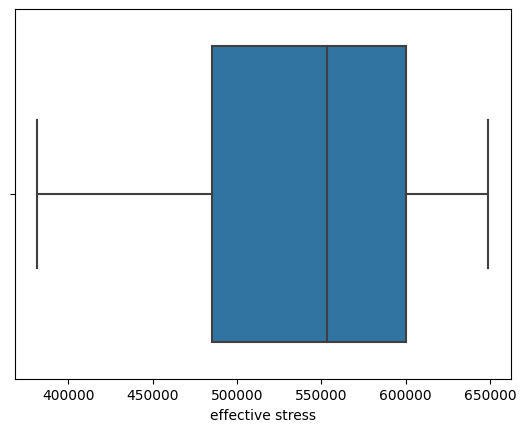

In [16]:
for col in cols :
    plt.figure()
    sns.boxplot(x=df[col])

Outlier Removed

Shape of train data after outlier removal

In [17]:
print('Train size: ',df.shape)

Train size:  (190, 11)


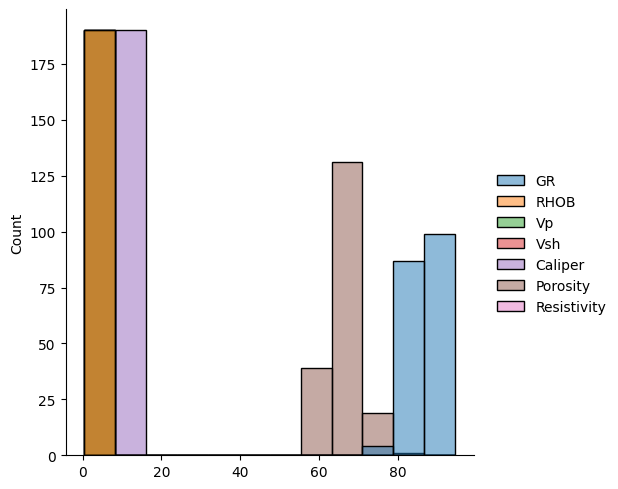

In [18]:
sns.displot(df[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity']])

Better to scale these values to (0,1)

In [19]:
#To work efficiently for Regression
from sklearn.preprocessing import MinMaxScaler

In [20]:
scale= MinMaxScaler()

In [21]:
cols= ['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity','Stress']

Train data

In [22]:
scaled= scale.fit_transform(df[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity','Stress']])

In [23]:
scaled_df = pd.DataFrame(scaled, columns=cols)



In [24]:
df= df.reset_index()

In [25]:
scaled_df

,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,0.042370,0.506020,0.315315,0.035197,0.477273,0.364787,0.165495,0.633919
1,0.244670,0.506996,0.477477,0.203249,0.474606,0.268073,0.221201,0.643273
2,0.197051,0.511552,0.786036,0.163691,0.489525,0.285591,0.273121,0.654057
3,0.111236,0.521315,0.819820,0.092404,0.502730,0.409990,0.256355,0.666942
4,0.193234,0.544745,0.635135,0.160520,0.526028,0.445390,0.215251,0.685358
...,...,...,...,...,...,...,...,...
185,0.772667,0.443541,0.236486,0.846637,0.395886,0.599884,0.249054,0.504648
186,0.605462,0.450374,0.240991,0.733837,0.302628,0.654884,0.240941,0.516081
187,0.574294,0.463716,0.259009,0.712810,0.241239,0.592070,0.216874,0.530002
188,0.585563,0.465343,0.279279,0.720413,0.314055,0.636674,0.188480,0.539514


In [26]:
merge= [df['DEPTH'],df['PP'],df['effective stress'],scaled_df]
pd.concat(merge,axis=1)

,DEPTH,PP,effective stress,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,35.1212,1656.000,551109.5426,0.042370,0.506020,0.315315,0.035197,0.477273,0.364787,0.165495,0.633919
1,35.2736,1658.000,553609.8401,0.244670,0.506996,0.477477,0.203249,0.474606,0.268073,0.221201,0.643273
2,35.4260,1656.000,556496.9260,0.197051,0.511552,0.786036,0.163691,0.489525,0.285591,0.273121,0.654057
3,35.5784,1657.000,559943.0630,0.111236,0.521315,0.819820,0.092404,0.502730,0.409990,0.256355,0.666942
4,35.7308,1656.000,564870.8409,0.193234,0.544745,0.635135,0.160520,0.526028,0.445390,0.215251,0.685358
...,...,...,...,...,...,...,...,...,...,...,...
185,33.3222,1552.000,516629.5362,0.772667,0.443541,0.236486,0.846637,0.395886,0.599884,0.249054,0.504648
186,33.4746,1552.000,519688.3610,0.605462,0.450374,0.240991,0.733837,0.302628,0.654884,0.240941,0.516081
187,33.6270,1552.498,523412.0498,0.574294,0.463716,0.259009,0.712810,0.241239,0.592070,0.216874,0.530002
188,33.7794,1554.988,525954.2562,0.585563,0.465343,0.279279,0.720413,0.314055,0.636674,0.188480,0.539514


In [27]:
# Assuming scaled_df is your scaled dataset DataFrame


In [28]:
df_scaled= pd.concat(merge,axis=1)

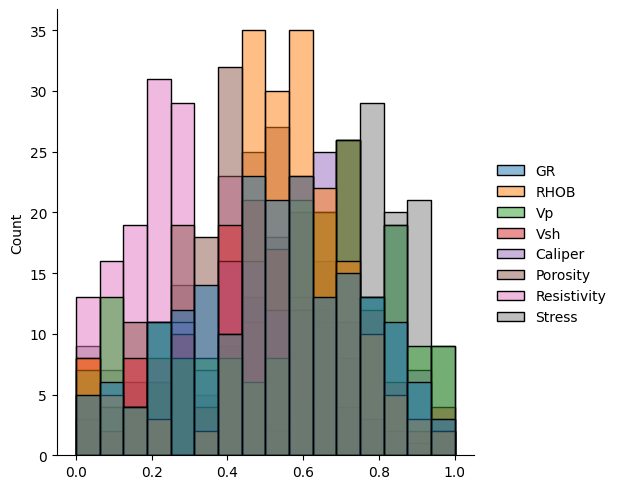

In [29]:
sns.displot(df_scaled[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity','Stress']])

Our Data is perfect and ready for model development

<Figure size 640x480 with 0 Axes>

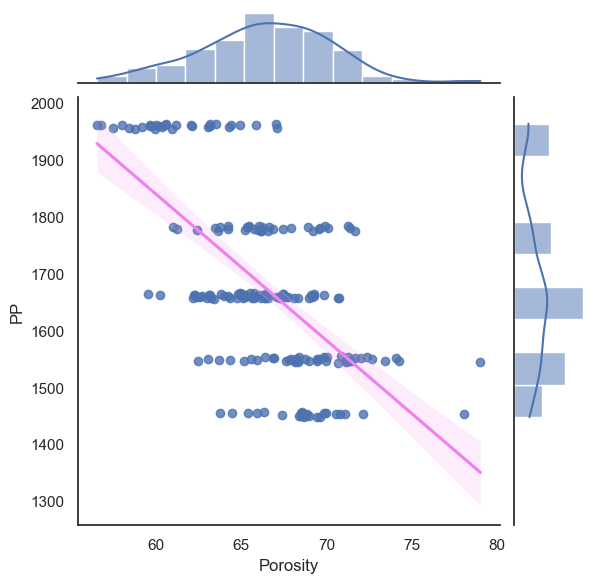

In [30]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['Porosity'], y = df['PP'], kind='reg', line_kws={"color": "violet"})

<Figure size 640x480 with 0 Axes>

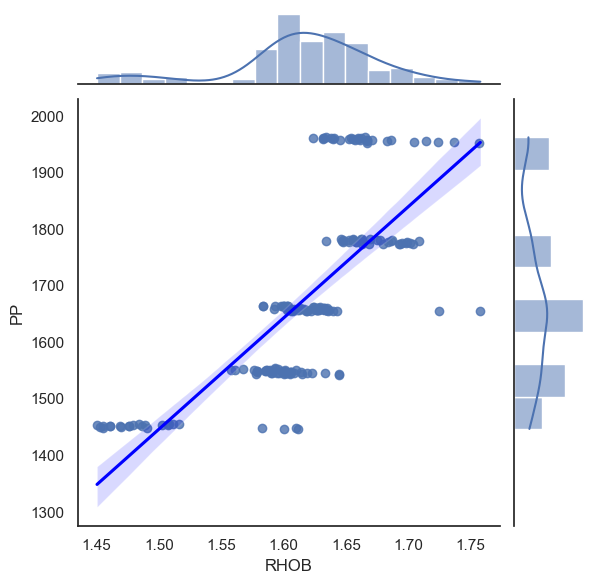

In [31]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['RHOB'], y = df['PP'], kind='reg', line_kws={"color": "Blue"})

In [32]:
# df= df_scaled.drop(['Vp'],axis=1)
# df

In [33]:
df.corr()

,index,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP,effective stress
index,1.000000,-0.071557,0.257387,-0.263259,0.003700,0.325342,0.317756,0.024139,0.340356,-0.121667,0.037553,-0.121883
DEPTH,-0.071557,1.000000,0.369452,0.452033,0.595726,0.035782,0.051566,-0.242919,0.132570,0.976057,0.404257,0.976297
GR,0.257387,0.369452,1.000000,0.484647,0.431650,0.839056,-0.029780,-0.261327,0.309469,0.441981,0.564148,0.441284
RHOB,-0.263259,0.452033,0.484647,1.000000,0.473697,0.462771,-0.468752,-0.415160,0.476451,0.633926,0.745212,0.633062
Vp,0.003700,0.595726,0.431650,0.473697,1.000000,0.166097,0.340375,-0.628734,0.463087,0.633205,0.756412,0.632316
Vsh,0.325342,0.035782,0.839056,0.462771,0.166097,1.000000,-0.104103,-0.228673,0.349538,0.140923,0.549079,0.139921
Caliper,0.317756,0.051566,-0.029780,-0.468752,0.340375,-0.104103,1.000000,-0.287139,0.057102,-0.071968,0.019276,-0.072089
Porosity,0.024139,-0.242919,-0.261327,-0.415160,-0.628734,-0.228673,-0.287139,1.000000,-0.410586,-0.309614,-0.627226,-0.308636
Resistivity,0.340356,0.132570,0.309469,0.476451,0.463087,0.349538,0.057102,-0.410586,1.000000,0.234605,0.683897,0.233424
Stress,-0.121667,0.976057,0.441981,0.633926,0.633205,0.140923,-0.071968,-0.309614,0.234605,1.000000,0.531341,0.999998


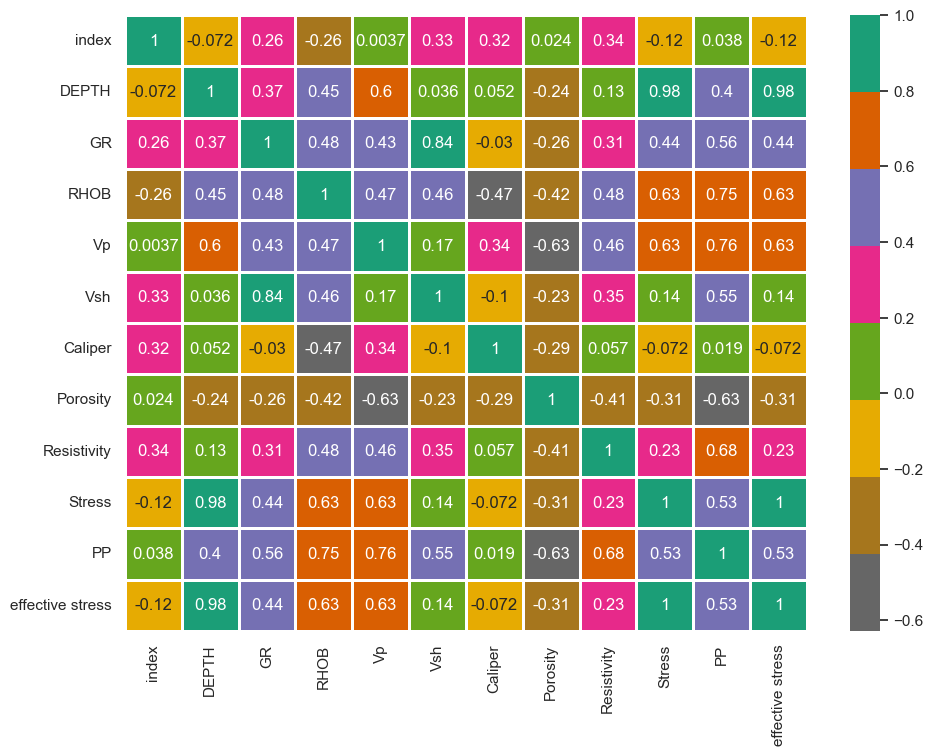

In [34]:
plt.figure(figsize=(11,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

#### Splitting the data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x= df.drop(['PP','DEPTH', 'effective stress'],axis=1) ##independent var
y= df['effective stress'] ## dependent var

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [38]:
print("Training size:",x_train.shape)
print("Testing size:",x_test.shape)

Training size: (152, 9)
Testing size: (38, 9)


### We will be using the following models:
- Linear Regression
- Random Forest Regressor

#### We will be HyperTuning the top model

## 1)  Regression Models

### Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)
model.fit(x_train, y_train)
pred = model.predict(x_test)
 
train_score = model.score(x_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(x_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 99.99995541176382
Test score of trained model: 99.99994913243161


In [40]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [ 1.47202176e+00  1.66896302e+01 -2.89573429e+02 -7.73789504e+03
 -1.40747758e+03  2.61098214e+01  2.81390583e+00 -4.32146809e+02
  9.99770140e-01]
Linear Model Coefficient (b):  9604.668668401893


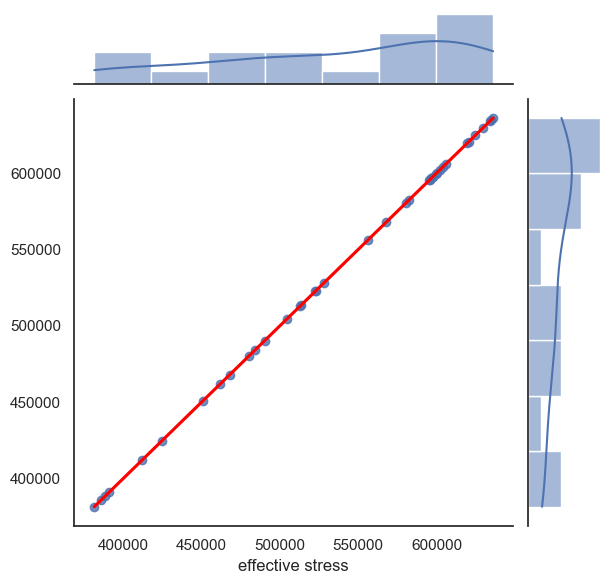

In [41]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

## Plot for observing the predicted and actual values

### Evaluation for Simple Linear Regression model

In [42]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2_linreg = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_linreg) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2_linreg, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,3296.797109
1,RMSE,57.417742
2,MAE,45.049711
3,MAPE,0.009003
4,r2,0.999999
5,adj_r2,0.999999


Simple Linear Regression Model performing well but if the data set get Bigger it will not give Good performance so we will also try Random Forest Regressor Model just to check the performance of Model...

### Evaluation by Random Forest Regressor Model

In [43]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()

reg.fit(x_train, y_train)

RandomForestRegressor()

In [44]:
pred=reg.predict(x_test)

In [45]:
rf_acc=r2_score(y_test, pred)
print("R^2",rf_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.9991193485886519
Adusted R^2 0.9988362820635758
MAE 1347.1104407631424
MSE 5707622.988480061
RMSE 2389.0632031154096


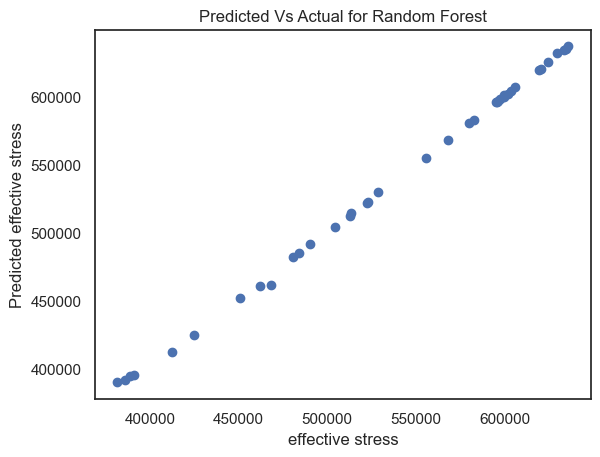

In [46]:
# visualize the difference between the actual and predicted pp
plt.scatter(y_test, pred)
plt.xlabel("effective stress")
plt.ylabel("Predicted effective stress")
plt.title("Predicted Vs Actual for Random Forest")
plt.show()

#### Random forest Regressor is also giving a good results
So lets Hypertune our Model and Predict

## Hypertuning of Random Forest Regressor
From here I took help from My Friend for Hypertuning of RFR.


In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [49]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Defining the parameters

In [50]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [51]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [52]:
best_params = rf_random.best_params_

In [53]:
rf_tuned= RandomForestRegressor(n_estimators= 800, min_samples_split= 2, min_samples_leaf= 1, max_features='sqrt', max_depth=100, bootstrap= True)

In [54]:
y_train

51     618506.4670
35     583427.1978
118    521343.1734
60     389935.3805
161    462083.2200
          ...     
106    630909.4778
14     591550.6706
92     591724.1563
179    506920.9004
102    625219.7962
Name: effective stress, Length: 152, dtype: float64

In [55]:
rf_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=800)

In [56]:
# x_test_without_xgb_column = x_test.drop(columns=['Predicted PP xgb'])
# pred_tunedrf = rf_tuned.predict(x_test_without_xgb_column)

pred_tunedrf= rf_tuned.predict(x_test)

In [57]:
rftuned_acc=r2_score(y_test, pred_tunedrf)
print("R^2",rftuned_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred_tunedrf))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred_tunedrf))
print("MSE", mean_squared_error(y_test, pred_tunedrf))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred_tunedrf)))

R^2 0.9938463198154278
Adusted R^2 0.9918683511846724
MAE 4322.6890579598185
MSE 39882848.11972452
RMSE 6315.286859654478


In [58]:
depth= np.linspace(30,300,len(x_test))

In [59]:
x_testplot= x_test.copy()

In [60]:
x_testplot['Depth']= depth


In [61]:
x_testplot['Acutal effective stress']= y_test

In [62]:
x_testplot['Predicted effective stress']= pred_tunedrf

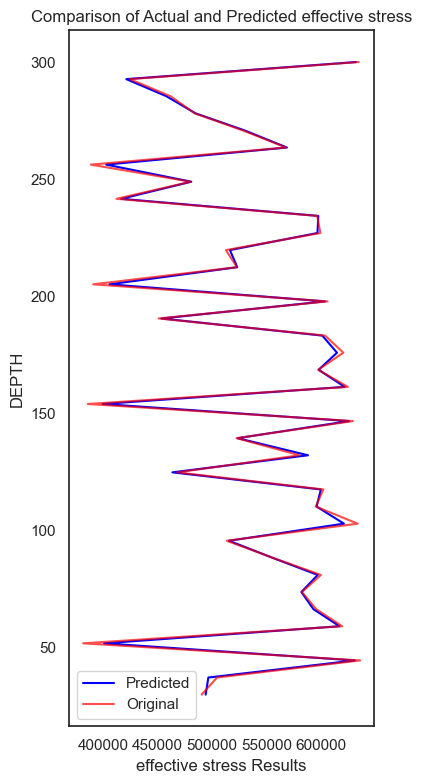

In [63]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted effective stress')
ax1.plot(x_testplot["Predicted effective stress"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal effective stress"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('effective stress Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

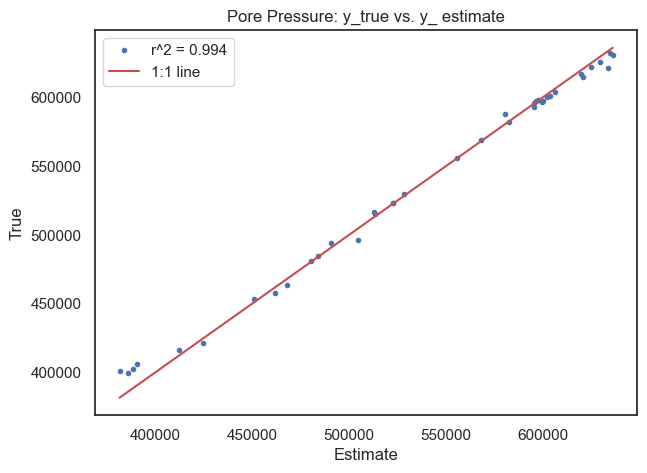

In [64]:
plt.figure(figsize=(7,5))
plt.plot(y_test, pred_tunedrf, '.', label = 'r^2 = %.3f' % (r2_score(y_test, pred_tunedrf)))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r', label = '1:1 line')
plt.title('Pore Pressure: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, shuffle= True, random_state=1)


predictions = []
scores=[]
for train, test in kf.split(x_test):
    # The predictors we're using the train the algorithm.
    train_predictors = x_train.iloc[train]
    # The target we're using to train the algorithm.
    train_target = y_train.iloc[train]
    # Training the algorithm using the predictors and target.
    rf_tuned.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = rf_tuned.predict(x_test)
    predictions.append(test_predictions)
    score = np.mean(cross_val_score(rf, x_train, y_train , cv=10))
    val_score= cross_val_score(rf, x_train, y_train , cv=10)
    
print (score)
print(val_score)

0.9984547730010851
[0.9991853  0.9989441  0.99494747 0.99690686 0.9969325  0.99964882
 0.99931487 0.99940074 0.99949569 0.99977137]


In [66]:
fr_val_score= val_score

In [67]:
rf_score_df= pd.DataFrame(fr_val_score)
rf_score_df= rf_score_df.reset_index()
rf_score_df

,index,0
0,0,0.999185
1,1,0.998944
2,2,0.994947
3,3,0.996907
4,4,0.996933
5,5,0.999649
6,6,0.999315
7,7,0.999401
8,8,0.999496
9,9,0.999771


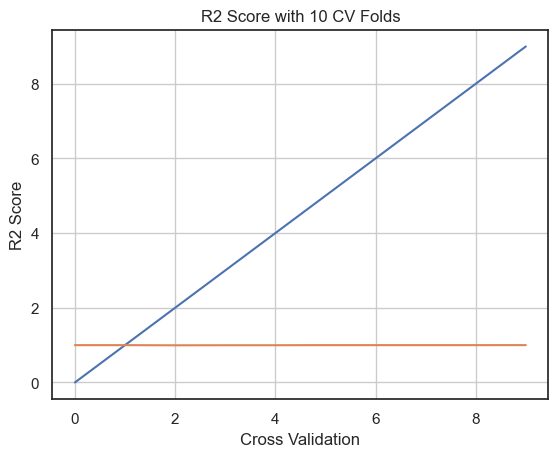

In [68]:
plt.plot(rf_score_df)
plt.title('R2 Score with 10 CV Folds')
plt.xlabel('Cross Validation')
plt.ylabel('R2 Score')
plt.grid()

## Results


### Effective stress predicted using ML algorithms with an accuracy of about 99 %